In [2]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading DS
df_train = pd.read_csv("../../data/train_data.csv")
df_test = pd.read_csv("../../data/test_data.csv")

C:\Users\Louis\AppData\Local\Temp\ipykernel_6704\1640102772.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../../data/train_data.csv")


# Exploratory Analysis

## Data contents and descriptive statistics

In [4]:
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


### Column Info

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [7]:
# Missing value ratio
missing_values = df_train.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df

,Missing Values,Percentage
OIICS Nature of Injury Description,593471,100.000000
IME-4 Count,460668,77.622664
First Hearing Date,442673,74.590502
C-3 Date,406226,68.449174
Birth Year,48523,8.176137
Average Weekly Wage,48096,8.104187
Zip Code,48082,8.101828
WCIO Part Of Body Description,36527,6.154808
WCIO Part Of Body Code,36527,6.154808
WCIO Nature of Injury Description,35102,5.914695


In [8]:
print(f"Total duplicate rows:", df_train.duplicated().sum())

Total duplicate rows: 0


### Descriptive Stats

In [34]:
# Helper functions

# Show the distributions of metric features with histograms
def num_dist(df, metric_features, bins=30):
    df[metric_features].hist(bins=bins, figsize=(15, 10))
    plt.suptitle("Distribution of Numerical Variables")
    plt.show()

# Show category counts and plots over the non-numerical features
def cat_counts_and_plots(df, excl_feat):
    for column in df.select_dtypes(include='object').columns: # Loop through the categorical columns
        if column not in excl_feat:
            # Display value counts
            print(f"Value counts for {column}:")
            print(df[column].value_counts())
            print("\n")
            
            # Plot count plot
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=column, order=df[column].value_counts().index)
            plt.title(f"Count of {column}")
            plt.xticks(rotation=90)
            plt.show()

In [35]:
# Print a heatmap based on a correlation matrix
def corr_heatmap(corr):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = corr, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [19]:
# Features of type date
date_features = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Non-metric (categorical) features
non_metric_features = df_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Non-metric features with high cardinality (many unique values)
threshold = 25 # Could be changed
non_metric_high_cardinality = [col for col in non_metric_features if df_train[col].nunique() > threshold]

# Get the metric (numerical) features by excluding the non-metric ones
metric_features = df_train.columns.drop(non_metric_features).to_list()

print("Non-metric (Categorical) features:", non_metric_features,"\n")
print("Non-metric (Categorical) high cardinality features:", non_metric_high_cardinality,"\n")
print("Metric (Numerical) features:", metric_features)

Non-metric (Categorical) features: ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'] 

Non-metric (Categorical) high cardinality features: ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'County of Injury', 'First Hearing Date', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code'] 

Metric (Numerical) features: ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury

#### Numerical values

In [20]:
df_train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


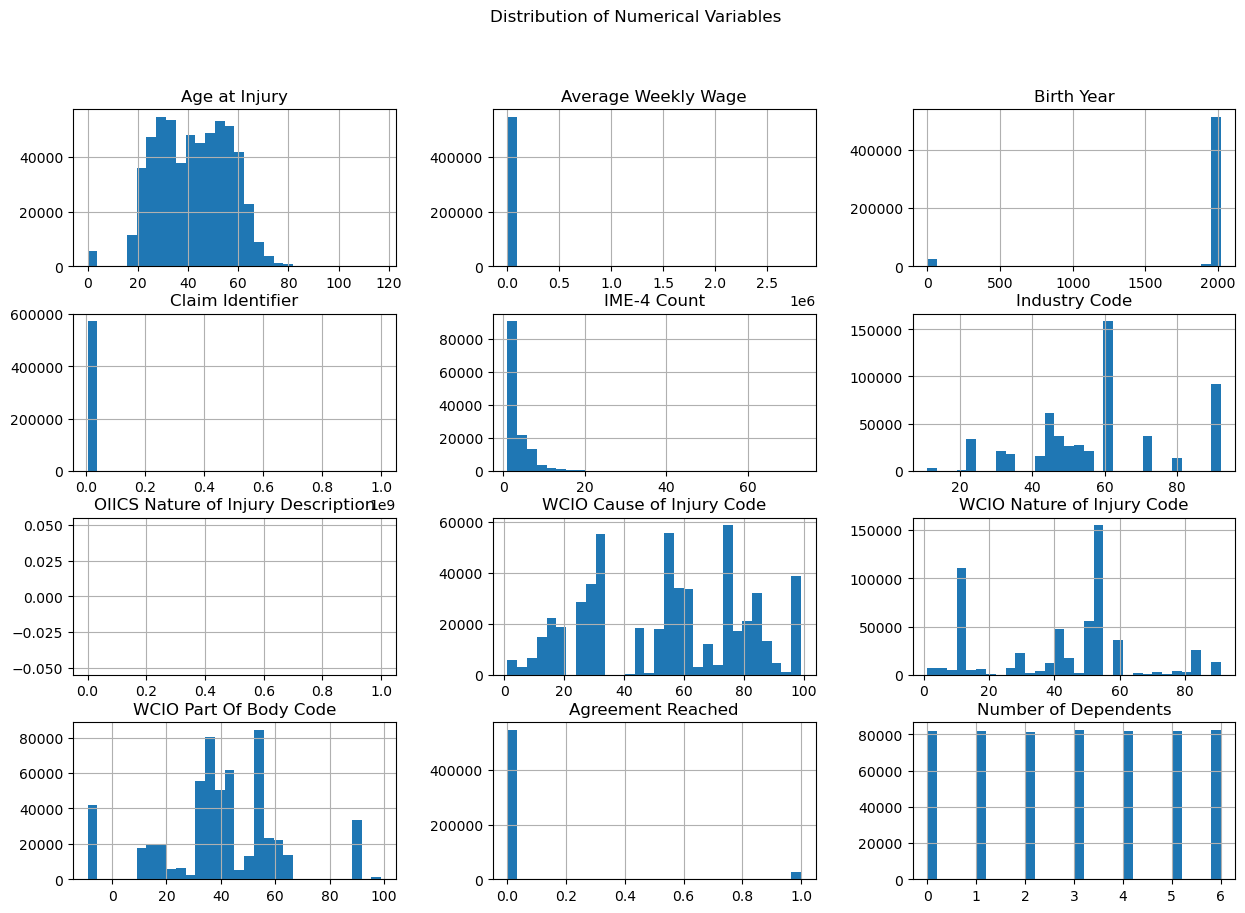

In [21]:
num_dist(df_train,metric_features)

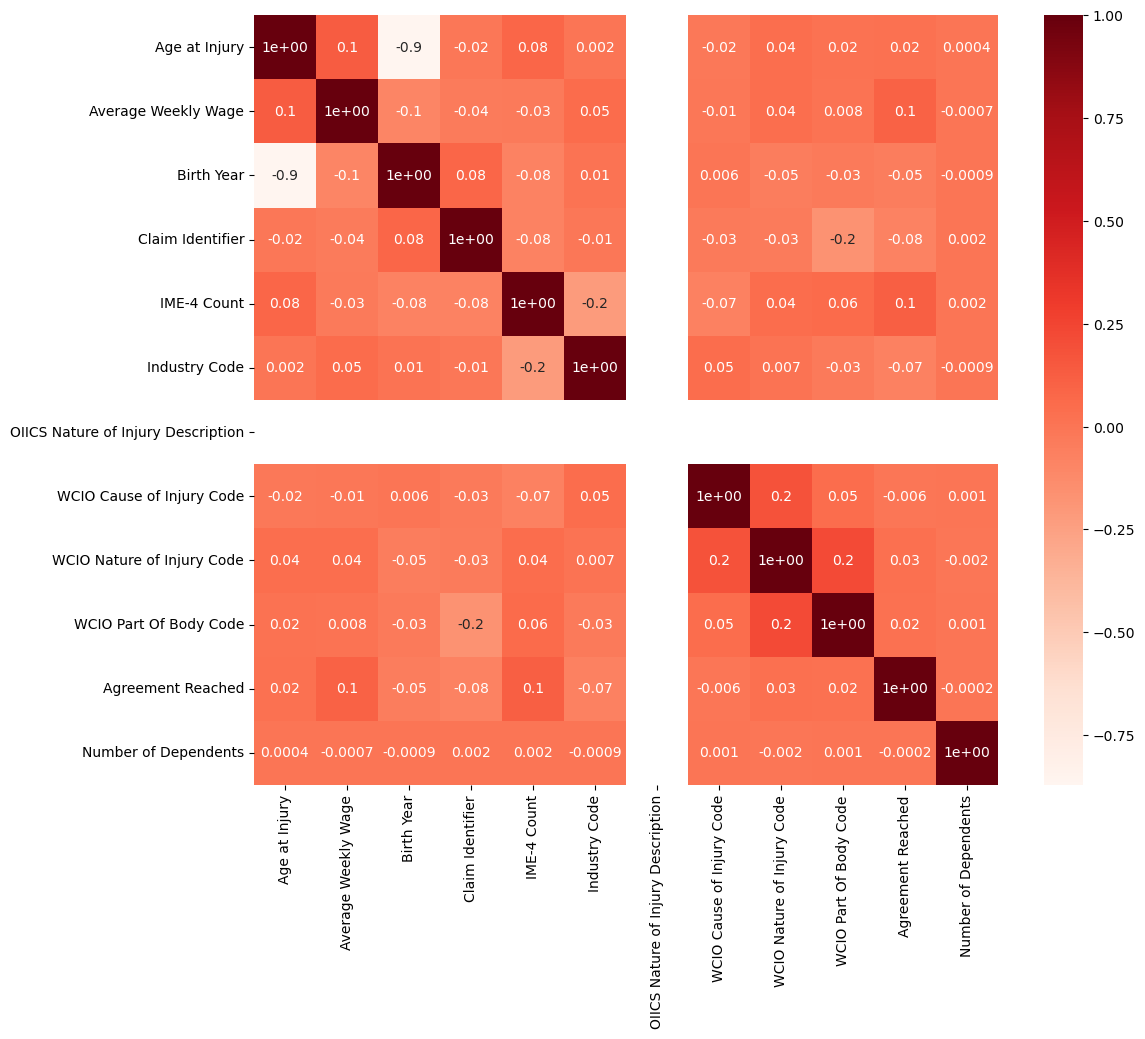

In [38]:
raw_corr = df_train[metric_features].corr(method="spearman")
corr_heatmap(raw_corr)

#### Categorical Values

In [3]:
df_train.describe(include =['O'])

NameError: name 'df_train' is not defined

Value counts for Alternative Dispute Resolution:
Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64




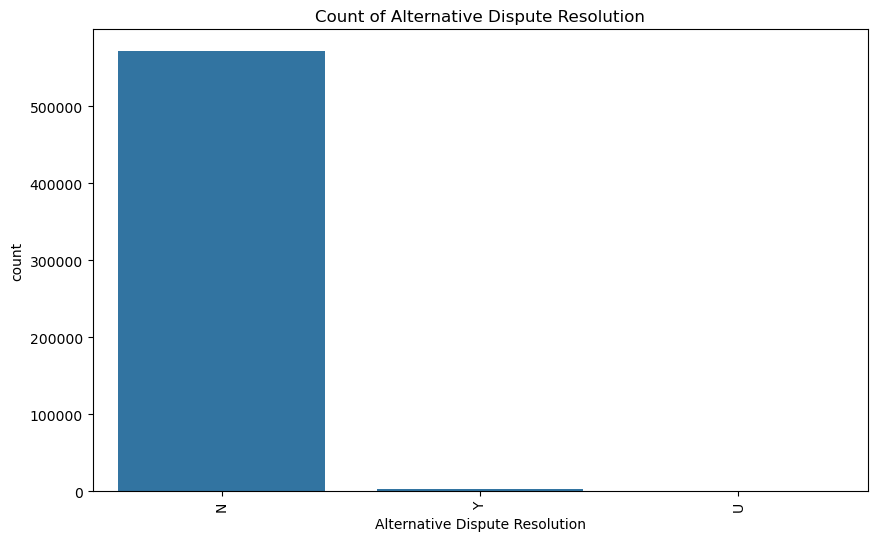

Value counts for Attorney/Representative:
Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64




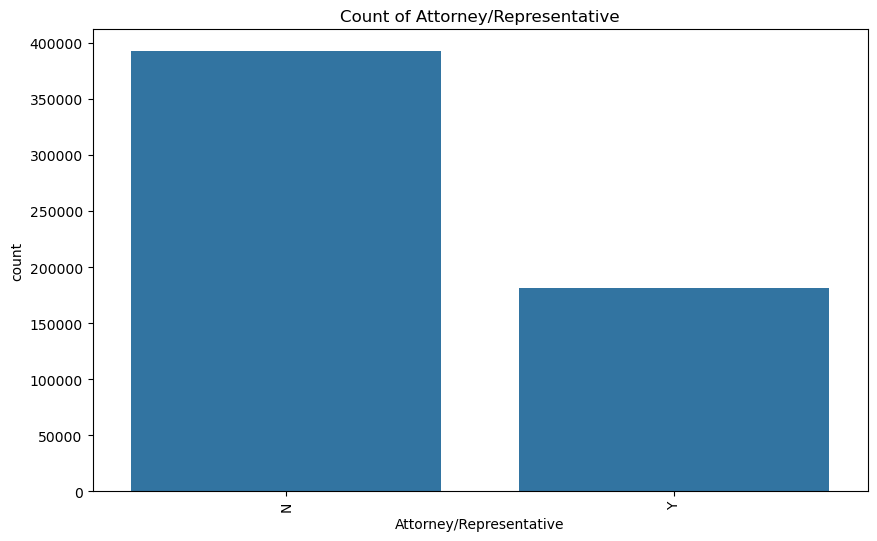

Value counts for Carrier Type:
Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64




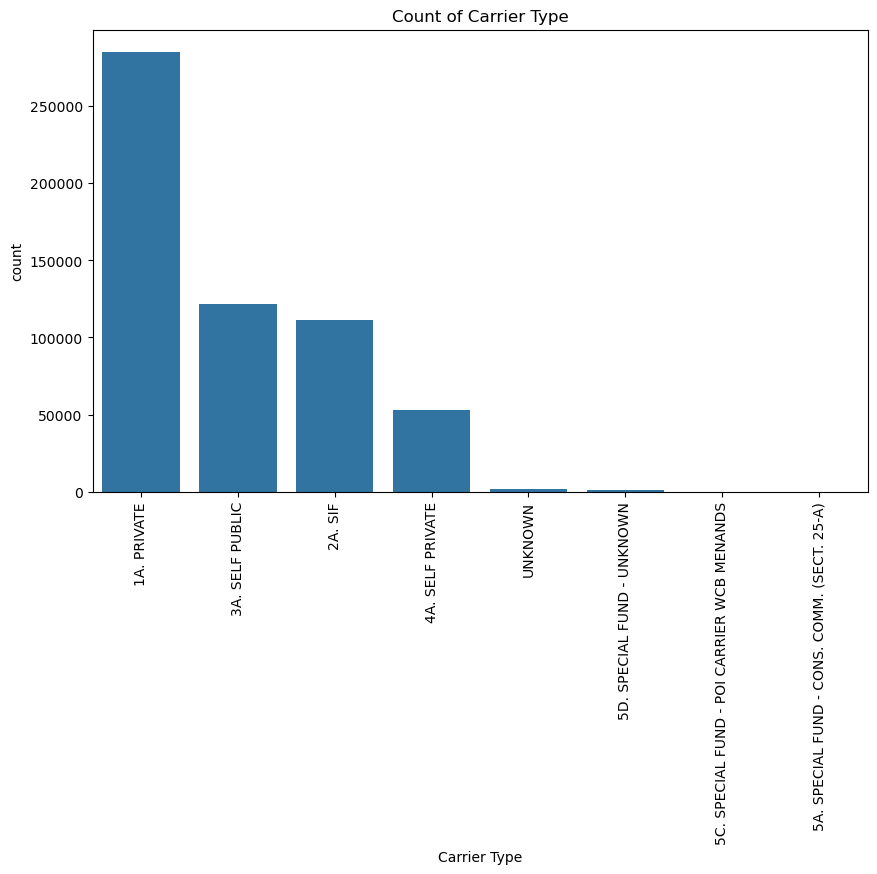

Value counts for Claim Injury Type:
Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64




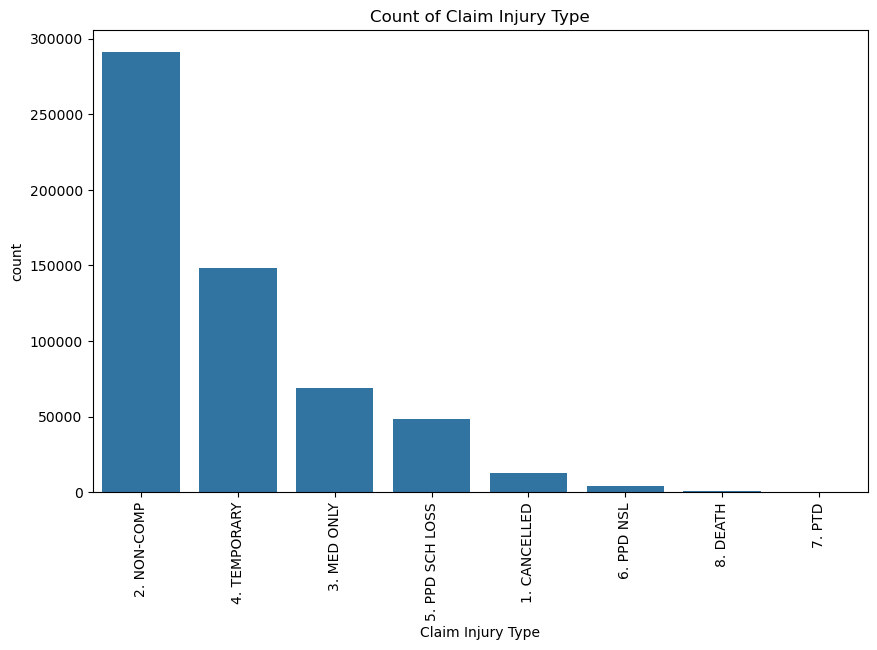

Value counts for COVID-19 Indicator:
COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64




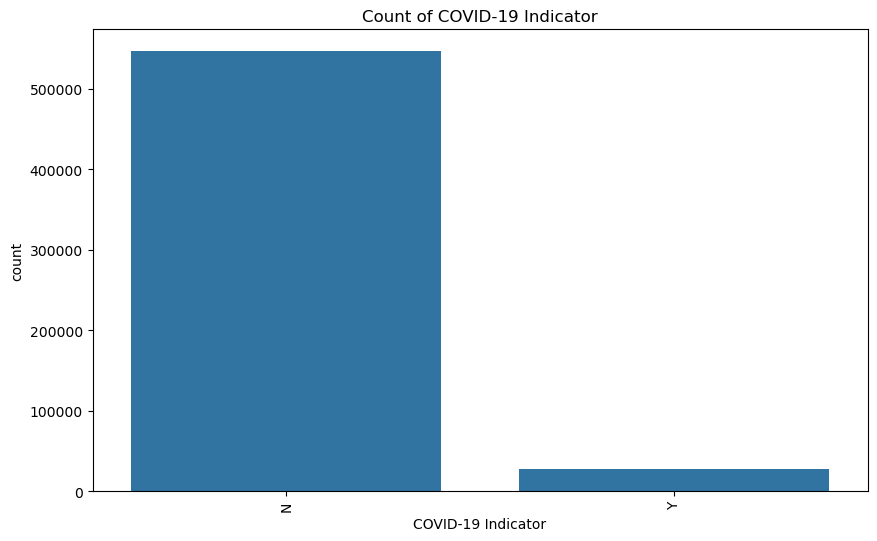

Value counts for District Name:
District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64




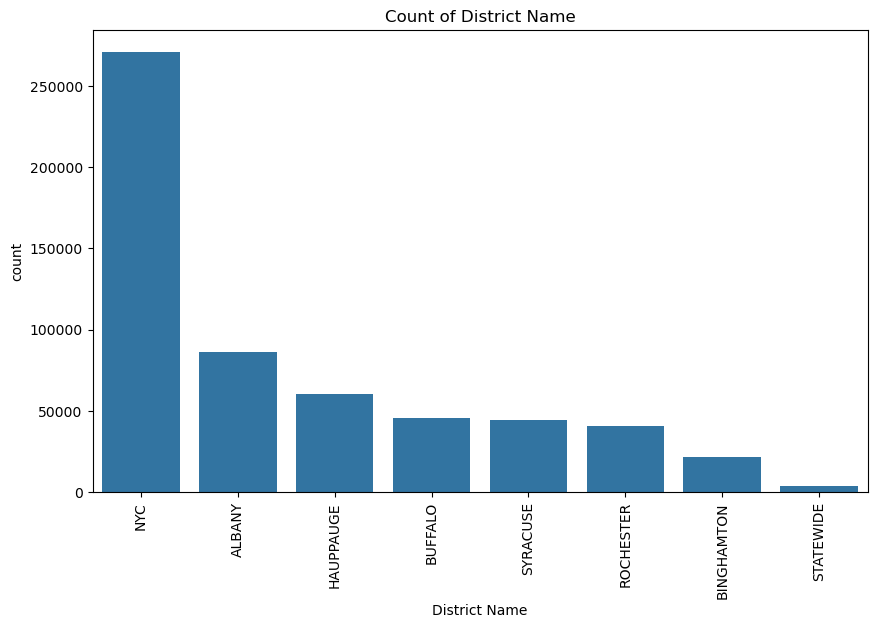

Value counts for Gender:
Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64




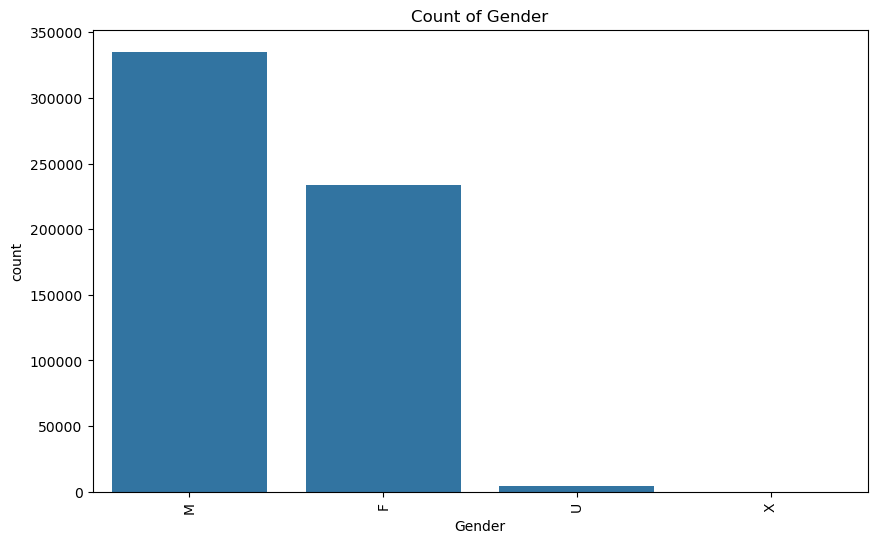

Value counts for Industry Code Description:
Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               114339
PUBLIC ADMINISTRATION                                            92240
RETAIL TRADE                                                     61638
TRANSPORTATION AND WAREHOUSING                                   54023
EDUCATIONAL SERVICES                                             44393
MANUFACTURING                                                    38150
CONSTRUCTION                                                     30903
ACCOMMODATION AND FOOD SERVICES                                  26456
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     21027
WHOLESALE TRADE                                                  15236
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    13149
ARTS, ENTERTAINMENT, AND RECREATION                               9967
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9770
INFORMA

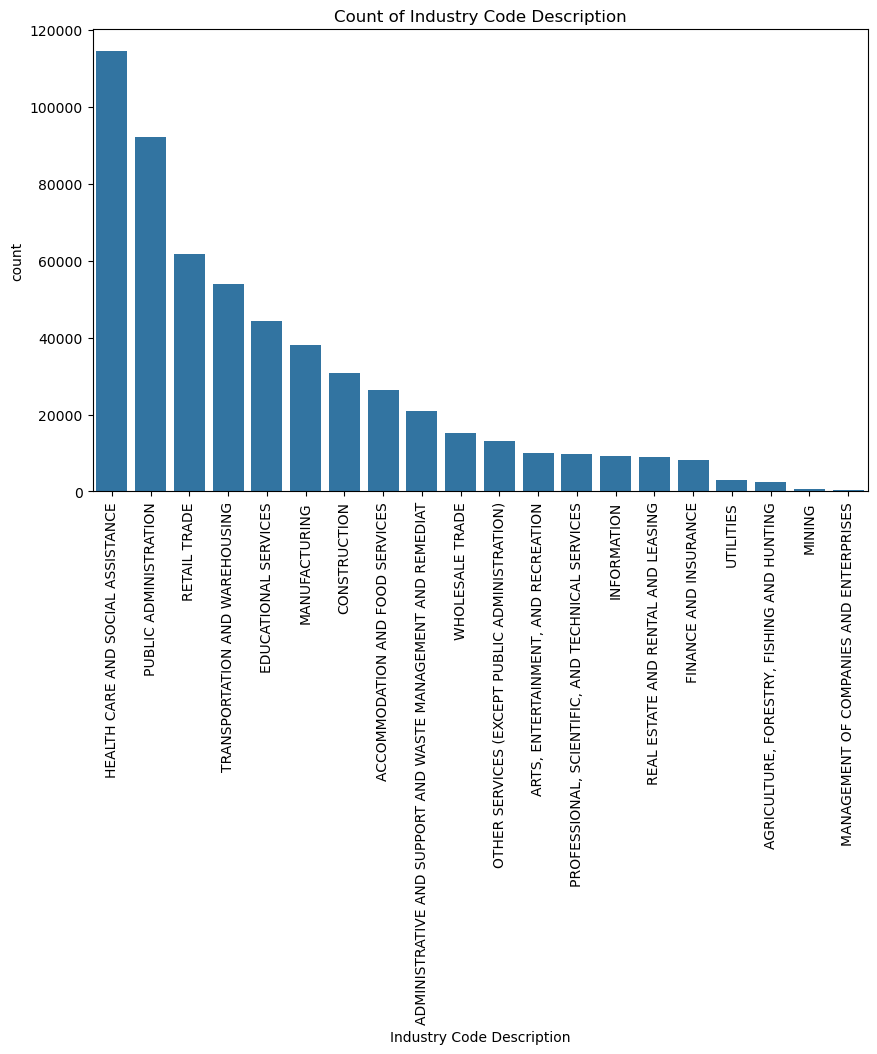

Value counts for Medical Fee Region:
Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64




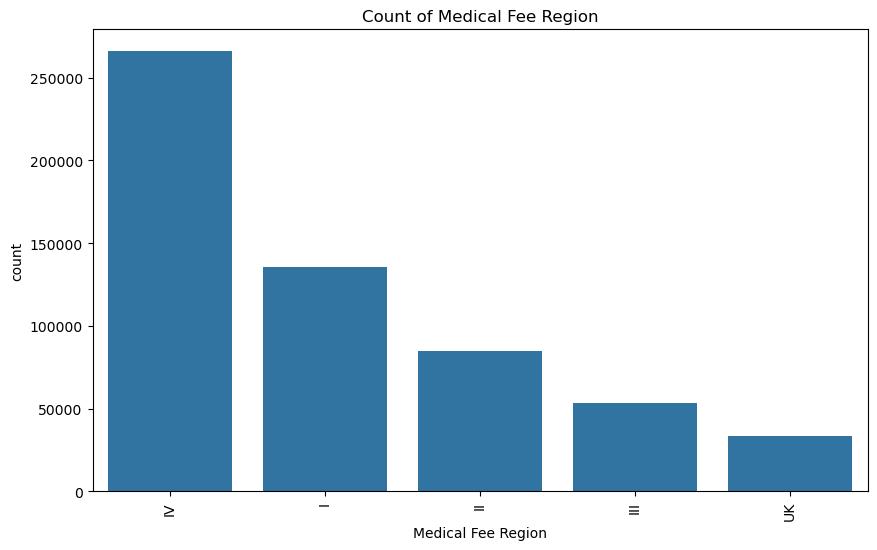

Value counts for WCB Decision:
WCB Decision
Not Work Related    574026
Name: count, dtype: int64




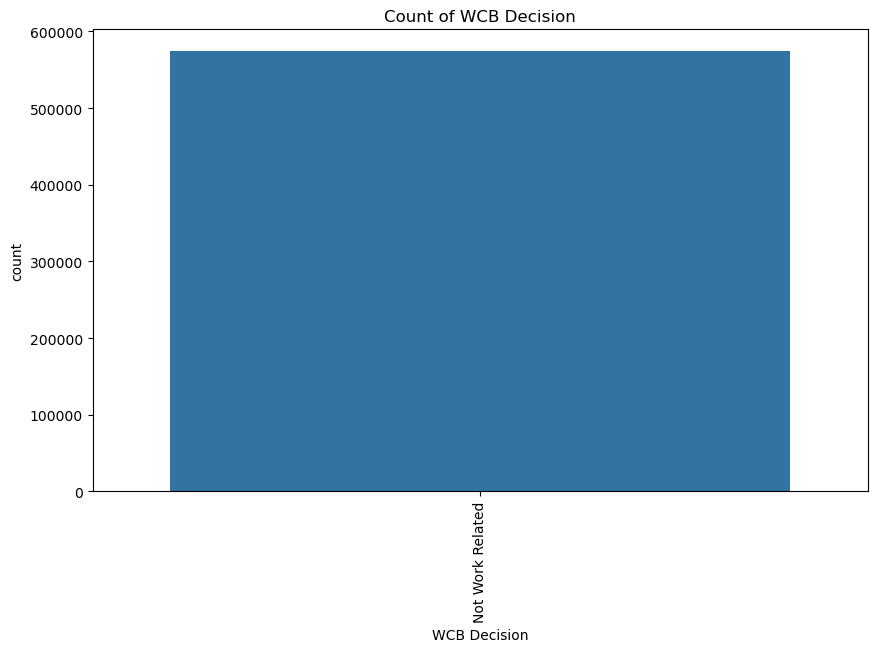

In [26]:
cat_counts_and_plots(df_train, non_metric_high_cardinality)